In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use("ggplot")

# # Multiple Output display
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# Importing the dataset

dataset = pd.read_csv('/content/drive/MyDrive/Wholesale customers data.csv')
dataset.shape
dataset.head(5)

(440, 8)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
dataset['Channel'] = dataset['Channel'].astype('category')
dataset['Region'] = dataset['Region'].astype('category')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Channel           440 non-null    category
 1   Region            440 non-null    category
 2   Fresh             440 non-null    int64   
 3   Milk              440 non-null    int64   
 4   Grocery           440 non-null    int64   
 5   Frozen            440 non-null    int64   
 6   Detergents_Paper  440 non-null    int64   
 7   Delicassen        440 non-null    int64   
dtypes: category(2), int64(6)
memory usage: 21.9 KB


In [ ]:
# Customer Segmentation by $ Revenue & Country

X = dataset
num_cols = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]

# Creating dummy variables for categorical types
cat_cols = ["Channel", "Region"]
dummies = pd.get_dummies(X[cat_cols])
# dummies.head(5)

# Combining dummy variables and numeric varianbles

X1 = X[num_cols]
X2 = pd.concat([dummies, X1], axis=1)
X = X2

y = dataset["Frozen"]

# Splitting the dataset into the training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.head(5)

X_test0 = X_test
y_test0 = y_test

,Channel_1,Channel_2,Region_1,Region_2,Region_3,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
14,False,True,False,False,True,24653,9465,12091,294,5058,2168
299,True,False,False,True,False,444,879,2060,264,290,259
356,True,False,False,False,True,22686,134,218,3157,9,548
200,False,True,True,False,False,3067,13240,23127,3941,9959,731
220,True,False,True,False,False,14755,899,1382,1765,56,749


In [ ]:
# Checking the variance explained by each principal component

from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("Variation explained by each principal component")
list(explained_variance)

Variation explained by each principal component


[0.46595784879068075,
 0.4047304413659375,
 0.0691599527894028,
 0.03775645653102071,
 0.016031919213089926,
 0.006363379487508998,
 8.365303815697426e-10,
 6.566091152574149e-10,
 3.292197502730826e-10,
 3.998465675200005e-35,
 1.3580654504813025e-35]

In [ ]:
# Principal component analysis to take the 2 top components

i = 2
from sklearn.decomposition import PCA
pca = PCA(n_components = i)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("Variation explained by each principal component")
list(explained_variance)

Variation explained by each principal component


[0.46595784879068075, 0.4047304413659375]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=1, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=7, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=9, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10, random_state=42)

Text(0.5, 1.0, 'The Elbow Method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'WCSS')

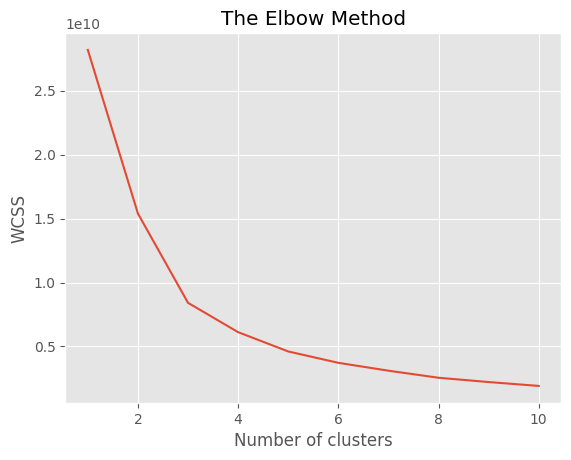

In [ ]:
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_test)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


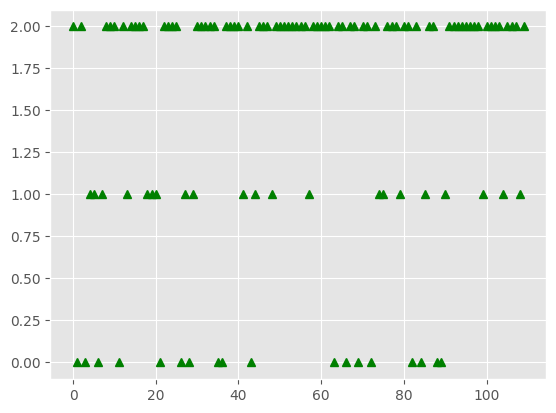

In [ ]:
# Fitting K-Means to the dataset
X3 = X_test
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X3)
plt.plot(y_kmeans, 'g^')
plt.show()

Text(0.5, 1.0, 'Customer segments')

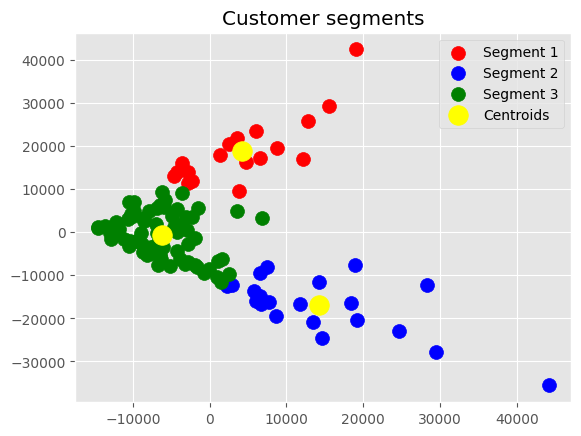

In [ ]:
# Visualising the clusters
plt.scatter(X3[y_kmeans == 0, 0], X3[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Segment 1')
plt.scatter(X3[y_kmeans == 1, 0], X3[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Segment 2')
plt.scatter(X3[y_kmeans == 2, 0], X3[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Segment 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Customer segments')
plt.legend()
plt.show()

In [ ]:
Customer_segment_class = pd.DataFrame(y_kmeans)
Customer_segment_class.columns = ["Customer_segment_class"]
X_test2 = X_test0.reset_index(drop=True)

Customer_segments = pd.concat([Customer_segment_class, X_test2], axis = 1)
# Customer_segments.head(5)

In [ ]:
# 1st Cluster
mask = Customer_segments["Customer_segment_class"] == 0
Customer_segments_1 = Customer_segments[mask]

# 2nd Cluster
mask = Customer_segments["Customer_segment_class"] == 1
Customer_segments_2 = Customer_segments[mask]

# 3rd Cluster
mask = Customer_segments["Customer_segment_class"] == 2
Customer_segments_3 = Customer_segments[mask]

In [ ]:
Customer_segments_1.groupby(["Channel_1", "Channel_2"]).size()
Customer_segments_2.groupby(["Channel_1", "Channel_2"]).size()
Customer_segments_3.groupby(["Channel_1", "Channel_2"]).size()

,,0
Channel_1,Channel_2,
False,True,18


,,0
Channel_1,Channel_2,
False,True,3
True,False,18


,,0
Channel_1,Channel_2,
False,True,19
True,False,52


In [ ]:
Customer_segments_1.groupby(["Region_1", "Region_2", "Region_3"]).size()
Customer_segments_2.groupby(["Region_1", "Region_2", "Region_3"]).size()
Customer_segments_3.groupby(["Region_1", "Region_2", "Region_3"]).size()

Region_1  Region_2  Region_3
False     False     True        13
          True      False        2
True      False     False        3
dtype: int64

Region_1  Region_2  Region_3
False     False     True        15
          True      False        2
True      False     False        4
dtype: int64

Region_1  Region_2  Region_3
False     False     True        52
          True      False        8
True      False     False       11
dtype: int64

<Axes: >

Text(0.5, 1.0, 'Fresh_1')

<Axes: title={'center': 'Fresh_1'}, ylabel='Frequency'>

<Axes: >

Text(0.5, 1.0, 'Freshs_2')

<Axes: title={'center': 'Freshs_2'}, ylabel='Frequency'>

<Axes: >

Text(0.5, 1.0, 'Fresh_3')

<Axes: title={'center': 'Fresh_3'}, ylabel='Frequency'>

<Axes: >

Text(0.5, 1.0, 'Milk_1')

<Axes: title={'center': 'Milk_1'}, ylabel='Frequency'>

<Axes: >

Text(0.5, 1.0, 'Milk_2')

<Axes: title={'center': 'Milk_2'}, ylabel='Frequency'>

<Axes: >

Text(0.5, 1.0, 'Milk_3')

<Axes: title={'center': 'Milk_3'}, ylabel='Frequency'>

<Axes: >

Text(0.5, 1.0, 'Grocery_1')

<Axes: title={'center': 'Grocery_1'}, ylabel='Frequency'>

<Axes: >

Text(0.5, 1.0, 'Grocery_2')

<Axes: title={'center': 'Grocery_2'}, ylabel='Frequency'>

<Axes: >

Text(0.5, 1.0, 'Grocery_3')

<Axes: title={'center': 'Grocery_3'}, ylabel='Frequency'>

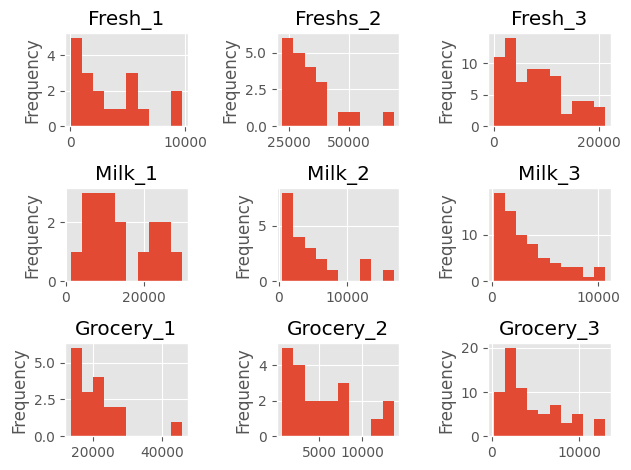

In [ ]:
# Fresh

plt.subplot(331)
plt.title('Fresh_1')
Output = None
Customer_segments_1["Fresh"].plot(kind = "hist", bins = 10)

plt.subplot(332)
plt.title('Freshs_2')
Output = None
Customer_segments_2["Fresh"].plot(kind = "hist", bins = 10)

plt.subplot(333)
plt.title('Fresh_3')
Output = None
Customer_segments_3["Fresh"].plot(kind = "hist", bins = 10)
plt.tight_layout()

# Milk

plt.subplot(334)
plt.title('Milk_1')
Output = None
Customer_segments_1["Milk"].plot(kind = "hist", bins = 10)

plt.subplot(335)
plt.title('Milk_2')
Output = None
Customer_segments_2["Milk"].plot(kind = "hist", bins = 10)

plt.subplot(336)
plt.title('Milk_3')
Output = None
Customer_segments_3["Milk"].plot(kind = "hist", bins = 10)
plt.tight_layout()

# Grocery

plt.subplot(337)
plt.title('Grocery_1')
Output = None
Customer_segments_1["Grocery"].plot(kind = "hist", bins = 10)

plt.subplot(338)
plt.title('Grocery_2')
Output = None
Customer_segments_2["Grocery"].plot(kind = "hist", bins = 10)

plt.subplot(339)
plt.title('Grocery_3')
Output = None
Customer_segments_3["Grocery"].plot(kind = "hist", bins = 10)
plt.tight_layout()

<Axes: >

Text(0.5, 1.0, 'Frozen_1')

<Axes: title={'center': 'Frozen_1'}, ylabel='Frequency'>

<Axes: >

Text(0.5, 1.0, 'Frozen_2')

<Axes: title={'center': 'Frozen_2'}, ylabel='Frequency'>

<Axes: >

Text(0.5, 1.0, 'Frozen_3')

<Axes: title={'center': 'Frozen_3'}, ylabel='Frequency'>

<Axes: >

Text(0.5, 1.0, 'Detergent_1')

<Axes: title={'center': 'Detergent_1'}, ylabel='Frequency'>

<Axes: >

Text(0.5, 1.0, 'Detergent_2')

<Axes: title={'center': 'Detergent_2'}, ylabel='Frequency'>

<Axes: >

Text(0.5, 1.0, 'Detergent_3')

<Axes: title={'center': 'Detergent_3'}, ylabel='Frequency'>

<Axes: >

Text(0.5, 1.0, 'Delicassen_1')

<Axes: title={'center': 'Delicassen_1'}, ylabel='Frequency'>

<Axes: >

Text(0.5, 1.0, 'Delicassen_2')

<Axes: title={'center': 'Delicassen_2'}, ylabel='Frequency'>

<Axes: >

Text(0.5, 1.0, 'Delicassen_3')

<Axes: title={'center': 'Delicassen_3'}, ylabel='Frequency'>

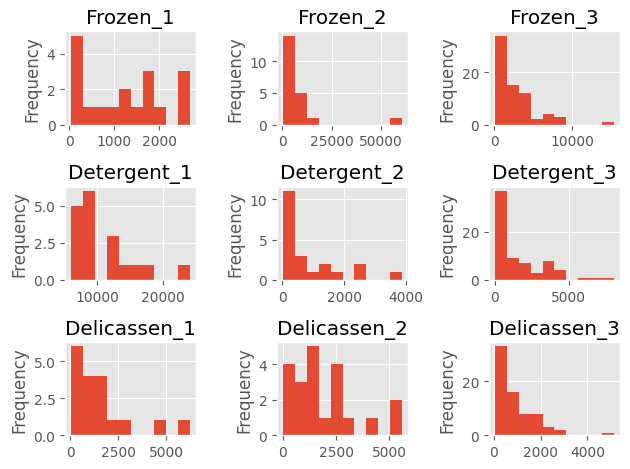

In [ ]:
# Frozen

plt.subplot(331)
plt.title('Frozen_1')
Customer_segments_1["Frozen"].plot(kind = "hist", bins = 10)

plt.subplot(332)
plt.title('Frozen_2')
Customer_segments_2["Frozen"].plot(kind = "hist", bins = 10)

plt.subplot(333)
plt.title('Frozen_3')
Customer_segments_3["Frozen"].plot(kind = "hist", bins = 10)
plt.tight_layout()

# Detergent Paper

plt.subplot(334)
plt.title('Detergent_1')
Customer_segments_1["Detergents_Paper"].plot(kind = "hist", bins = 10)

plt.subplot(335)
plt.title('Detergent_2')
Customer_segments_2["Detergents_Paper"].plot(kind = "hist", bins = 10)

plt.subplot(336)
plt.title('Detergent_3')
Customer_segments_3["Detergents_Paper"].plot(kind = "hist", bins = 10)
plt.tight_layout()

# Delicassen

plt.subplot(337)
plt.title('Delicassen_1')
Customer_segments_1["Delicassen"].plot(kind = "hist", bins = 10)

plt.subplot(338)
plt.title('Delicassen_2')
Customer_segments_2["Delicassen"].plot(kind = "hist", bins = 10)

plt.subplot(339)
plt.title('Delicassen_3')
Customer_segments_3["Delicassen"].plot(kind = "hist", bins = 10)
plt.tight_layout()

In [ ]:
# Importing the dataset

dataset = pd.read_excel('/content/drive/MyDrive/Online Retail1.xlsx')
dataset.shape
dataset.head(10)

(541909, 8)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,State
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,Uttar Pradesh
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,Uttar Pradesh
2,536365,84406B,CREAM CUttar PradeshID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,Uttar Pradesh
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,Uttar Pradesh
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,Uttar Pradesh
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,Uttar Pradesh
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,Uttar Pradesh
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,Uttar Pradesh
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,Uttar Pradesh
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,Uttar Pradesh


In [ ]:
# Removing missing data

dataset = dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   State        406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [ ]:
# Data Exploration

# Quantity
dataset.sort_values("Quantity", ascending = False).head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,State
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,Uttar Pradesh
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,Uttar Pradesh
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,Uttar Pradesh
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,Uttar Pradesh
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,Uttar Pradesh


In [ ]:
dataset.sort_values("Quantity", ascending = False).tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,State
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749.0,Uttar Pradesh
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,Uttar Pradesh
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,Uttar Pradesh
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,Uttar Pradesh
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,Uttar Pradesh


In [ ]:
mask = dataset["Quantity"] > 0

dataset = dataset [mask]
dataset.sort_values("Quantity", ascending = False).tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,State
389620,570482,23380,PACK OF 12 VINTAGE DOILY TISSUES,1,2011-10-10 17:00:00,0.39,17459.0,Uttar Pradesh
132735,547689,21528,DAIRY MAID TRADITIONAL TEAPOT,1,2011-03-24 14:55:00,6.95,17757.0,Uttar Pradesh
389621,570482,22615,PACK OF 12 CIRCUS PARADE TISSUES,1,2011-10-10 17:00:00,0.39,17459.0,Uttar Pradesh
389622,570482,23377,PACK OF 12 DOLLY GIRL TISSUES,1,2011-10-10 17:00:00,0.39,17459.0,Uttar Pradesh
109150,545587,21870,I CAN ONLY PLEASE ONE PERSON MUG,1,2011-03-04 09:46:00,1.25,14796.0,Uttar Pradesh


In [ ]:
# For some customers, their information on country is unspecified, lets filter those out

mask = dataset["State"] != "Unspecified"
dataset = dataset [mask]

In [ ]:
# Creating new column - Revenue in $

dataset["Revenue"] = dataset["Quantity"]*dataset["UnitPrice"]
dataset.head(10).sort_values("Revenue", ascending = False).head(5)

<ipython-input-149-756e5483e724>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Revenue"] = dataset["Quantity"]*dataset["UnitPrice"]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,State,Revenue
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,Uttar Pradesh,54.08
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,Uttar Pradesh,25.50
2,536365,84406B,CREAM CUttar PradeshID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,Uttar Pradesh,22.00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,Uttar Pradesh,20.34
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,Uttar Pradesh,20.34


In [ ]:
dataset.sort_values("Revenue", ascending = False).tail(5)

# Revenue is 0 for some quantities, as they may have been given away as promotional offers, I shll remove these as well

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,State,Revenue
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,Uttar Pradesh,0.0
485985,577696,M,Manual,1,2011-11-21 11:57:00,0.0,16406.0,Uttar Pradesh,0.0
454463,575579,22437,SET OF 9 BLACK SKULL BALLOONS,20,2011-11-10 11:49:00,0.0,13081.0,Uttar Pradesh,0.0
454464,575579,22089,PAPER BUNTING VINTAGE PAISLEY,24,2011-11-10 11:49:00,0.0,13081.0,Uttar Pradesh,0.0
285657,561916,M,Manual,1,2011-08-01 11:44:00,0.0,15581.0,Uttar Pradesh,0.0


In [ ]:
mask = dataset["Revenue"] > 0

dataset = dataset [mask]
dataset.sort_values("Revenue", ascending = False).head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,State,Revenue
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,Uttar Pradesh,168469.60
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,Uttar Pradesh,77183.60
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,Uttar Pradesh,38970.00
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,Uttar Pradesh,8142.75
348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,5.06,17450.0,Uttar Pradesh,7144.72


In [ ]:
dataset.sort_values("Revenue", ascending = False).tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,State,Revenue
500313,578757,16216,LETTER SHAPE PENCIL SHARPENER,1,2011-11-25 11:41:00,0.060,12748.0,Uttar Pradesh,0.060
361741,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,0.001,13405.0,Uttar Pradesh,0.001
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,Uttar Pradesh,0.001
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,Uttar Pradesh,0.001
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,Uttar Pradesh,0.001


In [ ]:
# Encoding variables

dataset["StockCode"] = dataset["StockCode"].astype('object')
dataset["CustomerID"] = dataset["CustomerID"].astype('object')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397640 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397640 non-null  object        
 1   StockCode    397640 non-null  object        
 2   Description  397640 non-null  object        
 3   Quantity     397640 non-null  int64         
 4   InvoiceDate  397640 non-null  datetime64[ns]
 5   UnitPrice    397640 non-null  float64       
 6   CustomerID   397640 non-null  object        
 7   State        397640 non-null  object        
 8   Revenue      397640 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 30.3+ MB


Unique customers:


4334

<Axes: xlabel='CustomerID'>

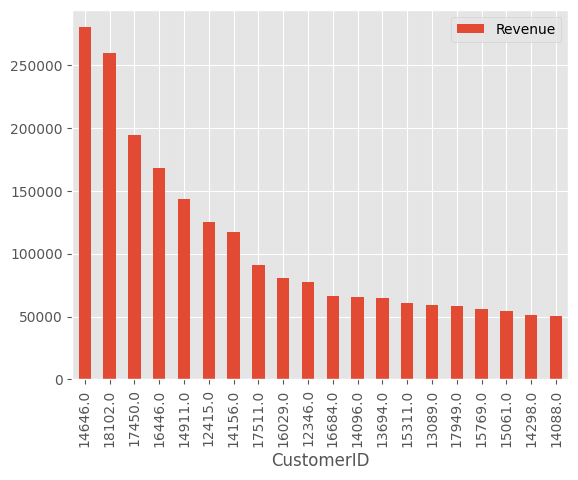

In [ ]:
# Customer ID

print("Unique customers:")
dataset["CustomerID"].nunique()

dataset.groupby("CustomerID").agg({"Revenue": "sum"}).sort_values("Revenue", ascending = False).head(20).plot(kind = "bar")

plt.show()


In [ ]:
# Customer IDs of top segments

dataset1 = dataset[["CustomerID", "Revenue"]]

print("Top customer segment IDs")
dataset2 = dataset1.groupby("CustomerID").agg({"Revenue": "sum"}).sort_values("Revenue", ascending = False)

dataset2.head(5)

Top customer segment IDs


,Revenue
CustomerID,
14646.0,280206.02
18102.0,259657.30
17450.0,194550.79
16446.0,168472.50
14911.0,143825.06


In [ ]:
# Identifying the top 20 % customer segments driving 80 % $ sales

h = dataset1["CustomerID"].nunique()
i = round(0.25*h)
print("# of customers in top 25% power segment:", i, "out of", h)

j = dataset1.groupby("CustomerID").agg({"Revenue": "sum"}).sort_values("Revenue", ascending = False).head(i).sum()
k = dataset1["Revenue"].sum()

l = j/k*100
print("Total sales resulting from the top product segment:", round(list(l)[0]), "%")

# of customers in top 25% power segment: 1084 out of 4334
Total sales resulting from the top product segment: 79 %


In [ ]:
# Products

dataset1 = dataset[["Description", "Revenue"]]
print("Unique products:")
dataset1["Description"].nunique()

Unique products:


3877

3877


<Axes: xlabel='Description'>

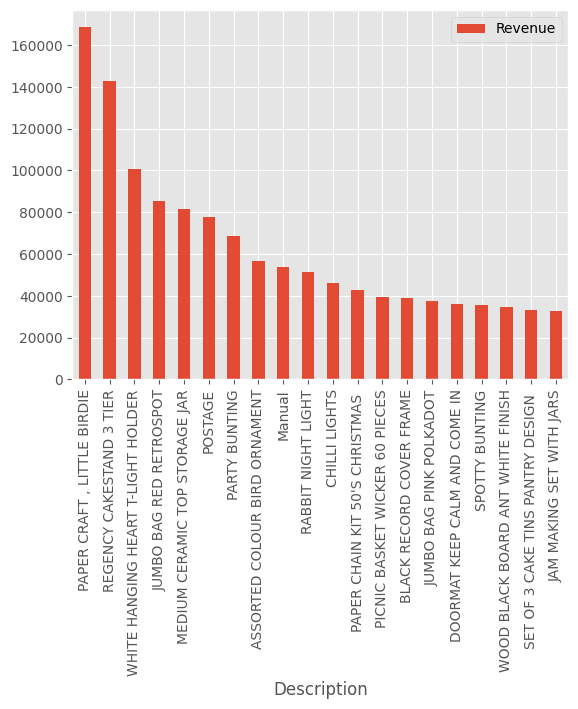

In [ ]:
print(dataset1["Description"].nunique())
dataset2 = dataset1.groupby("Description").agg({"Revenue": "sum"}).sort_values("Revenue", ascending = False)
dataset2.head(20).plot(kind = "bar")
plt.show()

In [ ]:
# # Multiple Output display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# Identifying the top 20 % products driving 80 % of $ sales

h = dataset1["Description"].nunique()
i = round(0.20*h)
print("# of products in top 20 % segment:", i, "out of", h)

j = dataset2.head(i).sum()
k = dataset1["Revenue"].sum()

l = j/k*100
print("Total sales resulting from the top product segment:", round(list(l)[0]), "%")

# of products in top 20 % segment: 775 out of 3877
Total sales resulting from the top product segment: 79 %


State:


6

Top 3 states by $ sales:


<Axes: xlabel='State'>

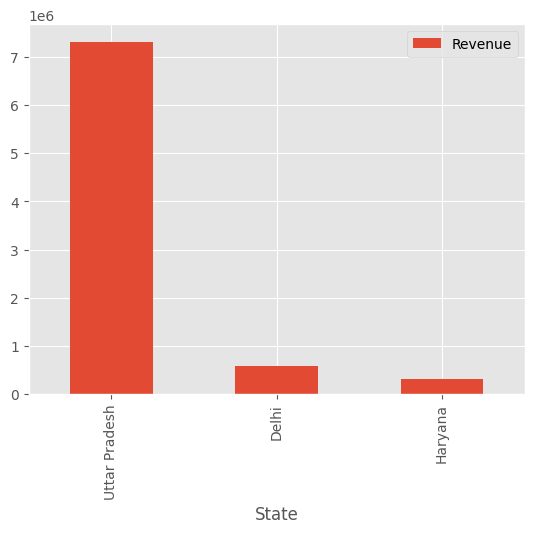

In [ ]:
# Segmenting sales by geographic location

dataset1 = dataset[["State", "Revenue"]]

print("State:")
dataset1["State"].nunique()
print("Top 3 states by $ sales:")
dataset2 = dataset1.groupby("State").agg({"Revenue": "sum"}).sort_values("Revenue", ascending = False)
dataset2.head(3).plot(kind = "bar")

# Analysis:

Bottom 3 countries by $ sales:


<Axes: xlabel='State'>

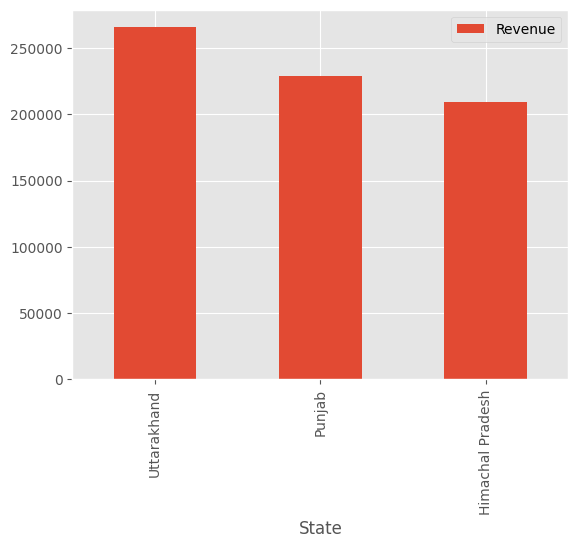

In [ ]:
print("Bottom 3 countries by $ sales:")

dataset2.tail(3).plot(kind = "bar")

# Analysis

In [ ]:
#Identifying the top 20 % geographic locations driving 80 % of $ sales

h = dataset1["State"].nunique()
i = 1

print("# of products in Delhi:")

j = dataset2.head(i).sum()
k = dataset1["Revenue"].sum()

l = j/k*100
print("Total $ sales resulting from Delhi:", round(list(l)[0]), "%")

# of products in Delhi:
Total $ sales resulting from Delhi: 82 %


In [ ]:
dataset2.head(6)

,Revenue
State,
Uttar Pradesh,7308391.554
Delhi,584255.750
Haryana,312656.440
Uttarakhand,265545.900
Punjab,228867.140
Himachal Pradesh,209024.050
